## ZINC Data of *Human* Dihydrofolate Reductase Inhibitors

**Date:** 23/01/23

**Done by:** Gustavo H. M. Sousa

Session information at the end of the notebook.

Unfortunately, no API method for retrieving the data of ZINC database is currently available, so I did a manual search for experimental observations of the target: Dihydrofolate Reductase  for *Human*.

The method used was to find the **UniProt ID** for the target of interest and search by it's respective associated gene. The following information was used to fetch the data:
* **UniProt ID:** P00374
* **Gene:** DHFR (Human)

Then we download the [ZINC data](https://zinc.docking.org/genes/DHFR/observations/) using the *gene* tag and a 'csv' and 'smi' file was manually saved.
The SDF file was not made available at the time of this writing.

### Importing the libraries

In [1]:
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit import Chem

### Importing the data

First we need to import the `SMI` data. It is just a csv but the separator is a space character " ". That being stated we can import it as a csv and add the specific separator in the argument.

In [2]:
zinc_human_smi = pd.read_csv('data/MANUAL/MANUAL_human_dhfr_zinc_smiles.smi', sep=" ")
zinc_human_smi

,smiles,zinc_id,ortholog_name,gene_name,affinity,chembldocid,title,reference.pubmed_id,reference.doi,reference.chembl_id
0,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...,ZINC000001529323,DYR_BOVIN,DHFR,8.77,8611,None,4009615,None,CHEMBL1122902
1,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...,ZINC000001529323,DYR_BOVIN,DHFR,8.48,8249,None,6585550,None,CHEMBL1122648
2,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...,ZINC000001529323,DYR_BOVIN,DHFR,8.47,58277,None,20036565,None,CHEMBL1799979
3,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...,ZINC000001529323,DYR_BOVIN,DHFR,8.10,90791,None,25139568,None,CHEMBL3352542
4,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...,ZINC000001529323,DYR_BOVIN,DHFR,7.10,50832,None,20350811,None,CHEMBL1156232
...,...,...,...,...,...,...,...,...,...,...
3225,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125042,DYR_HUMAN,DHFR,6.52,9084,None,3091832,None,CHEMBL1123439
3226,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125045,DYR_HUMAN,DHFR,6.52,9084,None,3091832,None,CHEMBL1123439
3227,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125048,DYR_HUMAN,DHFR,6.52,9084,None,3091832,None,CHEMBL1123439
3228,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@H](C[C...,ZINC000261160525,DYR_HUMAN,DHFR,7.24,10739,None,1992118,None,CHEMBL1125723


We can check each of the variables type by using the `dtypes` dataframe method.

In [3]:
zinc_human_smi.dtypes

smiles                  object
zinc_id                 object
ortholog_name           object
gene_name               object
affinity               float64
chembldocid              int64
title                   object
reference.pubmed_id     object
reference.doi           object
reference.chembl_id     object
dtype: object

As we can see above, the affinity is already a number type (*float64*).

One can also see that there a various types of orthologs, and we need to remove the `DYR_BOVIN` and other entries that are not `DYR_HUMAN`.

And that is our first task:

In [4]:
print(f"We have this type of orthologs in our dataset: \n{zinc_human_smi['ortholog_name'].unique()}")
print(f"Before removing the not human entries we have {zinc_human_smi.shape[0]} entries.")
# Selecting only one type of ortholog, human in our case
zinc_human_smi = zinc_human_smi[zinc_human_smi['ortholog_name'] == 'DYR_HUMAN']
print(f"After sticking only the human entries we have {zinc_human_smi.shape[0]}")

We have this type of orthologs in our dataset: 
['DYR_BOVIN' 'DYR_MOUSE' 'DYR_RAT' 'DYR_CHICK' 'DYR_HUMAN']
Before removing the not human entries we have 3230 entries.
After sticking only the human entries we have 1370


We also do not need the variables: `reference.doi` and `title`, as most of it is just *None* entries

In [5]:
zinc_human_smi = zinc_human_smi.drop(['reference.doi', 'title'], axis=1)


,smiles,zinc_id,ortholog_name,gene_name,affinity,chembldocid,reference.pubmed_id,reference.chembl_id
1860,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,10.60,13799,8632413,CHEMBL1129493
1861,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,8.70,13052,7658448,CHEMBL1128547
1862,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,8.52,73640,23627352,CHEMBL2380288
1863,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,7.48,13250,7877140,CHEMBL1128249
1864,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,7.42,13250,7877140,CHEMBL1128249
...,...,...,...,...,...,...,...,...
3225,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125042,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439
3226,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125045,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439
3227,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125048,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439
3228,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@H](C[C...,ZINC000261160525,DYR_HUMAN,DHFR,7.24,10739,1992118,CHEMBL1125723


In [6]:
zinc_human_smi.reset_index(drop=True, inplace=True)
zinc_human_smi

,smiles,zinc_id,ortholog_name,gene_name,affinity,chembldocid,reference.pubmed_id,reference.chembl_id
0,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,10.60,13799,8632413,CHEMBL1129493
1,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,8.70,13052,7658448,CHEMBL1128547
2,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,8.52,73640,23627352,CHEMBL2380288
3,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,7.48,13250,7877140,CHEMBL1128249
4,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,7.42,13250,7877140,CHEMBL1128249
...,...,...,...,...,...,...,...,...
1365,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125042,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439
1366,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125045,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439
1367,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125048,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439
1368,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@H](C[C...,ZINC000261160525,DYR_HUMAN,DHFR,7.24,10739,1992118,CHEMBL1125723


### Preprocessing the data

#### Processing the variables

We need to do a sanity check into the smiles to see if they are canonical. In order to do this, create a function to append the 'canonical_smiles and check if there are any missing values (i.e. non-convertable smiles)

In [12]:
canonical_smiles = []

for i, compound in zinc_human_smi.iterrows():
    try:
        Chem.MolFromSmiles(compound['smiles'])
        canonical_smiles.append(compound['smiles'])
    except None:
        print(f"This smile is not canonical {compound['smiles']}")

print(len(canonical_smiles))


1370


Changing the `affinity` variable to a float number

In [13]:
zinc_human_smi = zinc_human_smi.astype({'affinity': 'float64'})

smiles                  object
zinc_id                 object
ortholog_name           object
gene_name               object
affinity               float64
chembldocid              int64
reference.pubmed_id     object
reference.chembl_id     object
dtype: object

In [15]:
zinc_human_mean = zinc_human_smi[['zinc_id', 'affinity']].groupby('zinc_id').mean()
zinc_human_mean.reset_index(inplace=True)
zinc_human_mean

,zinc_id,affinity
0,ZINC000000000640,8.544
1,ZINC000000001233,7.250
2,ZINC000000005734,9.520
3,ZINC000000006585,5.070
4,ZINC000000007486,6.820
...,...,...
914,ZINC000261125042,6.520
915,ZINC000261125045,6.520
916,ZINC000261125048,6.520
917,ZINC000261160525,7.240


In [16]:
zinc_human_last = zinc_human_smi[['zinc_id', 'affinity']].drop_duplicates('zinc_id', keep='last')
zinc_human_last.reset_index(inplace=True)
zinc_human_last

,index,zinc_id,affinity
0,4,ZINC000000000640,7.42
1,5,ZINC000000001233,7.25
2,6,ZINC000000005734,9.52
3,8,ZINC000000006585,5.07
4,9,ZINC000000007486,6.82
...,...,...,...
914,1365,ZINC000261125042,6.52
915,1366,ZINC000261125045,6.52
916,1367,ZINC000261125048,6.52
917,1368,ZINC000261160525,7.24


#### Dropping NA values

In [18]:
# Main dataset, that's going to later be the 'first' entry only
zinc_human_smi.dropna(how='any', axis=0, inplace=True)
print(f'After removing the NAs of the main dataset: {zinc_human_smi.shape[0]}')

After removing the NAs of the main dataset: 1370


In [19]:
# Mean dataset
zinc_human_mean.dropna(how='any', axis=0, inplace=True)
print(f"After removing the NAs of the mean dataset: {zinc_human_mean.shape[0]}")

After removing the NAs of the mean dataset: 919


In [21]:
# Last dataset
zinc_human_last.dropna(how='any', axis=0, inplace=True)
print(f"After removing the NAs of the last dataset: {zinc_human_last.shape[0]}")

After removing the NAs of the last dataset: 919


### Renaming columns

In [23]:
zinc_human_mean.rename(columns={'affinity':'mean_affinity'}, inplace=True)
zinc_human_last.rename(columns={'affinity':'last_affinity'}, inplace=True)

In [26]:
zinc_human_smi.drop_duplicates('zinc_id', keep='first', inplace=True)
zinc_human_smi = zinc_human_smi.rename(columns={'affinity':'first_affinity'})

### Merging the three datasets

Now we finally merge the three datasets (mean, last and first pKi data observations)

In [27]:
zinc_human_merged = pd.merge(zinc_human_smi, zinc_human_last, how='left', on='zinc_id')
zinc_human_merged = pd.merge(zinc_human_merged, zinc_human_mean, how='left', on='zinc_id')

zinc_human_merged

,smiles,zinc_id,ortholog_name,gene_name,first_affinity,chembldocid,reference.pubmed_id,reference.chembl_id,index,last_affinity,mean_affinity
0,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000000640,DYR_HUMAN,DHFR,10.60,13799,8632413,CHEMBL1129493,4,7.42,8.544
1,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,ZINC000000001233,DYR_HUMAN,DHFR,7.25,53022,20350951,CHEMBL1255487,5,7.25,7.250
2,CCC(CC)n1c(C)cc2c3c(N)nc(N)nc3ccc21,ZINC000000005734,DYR_HUMAN,DHFR,9.52,13799,8632413,CHEMBL1129493,6,9.52,9.520
3,COc1ccc(OC)c(CN(C)c2cnc3nc(N)nc(N)c3c2)c1,ZINC000000006585,DYR_HUMAN,DHFR,5.07,13858,8691474,CHEMBL1129539,8,5.07,5.070
4,COc1ccc(C)c(NCc2cnc3nc(N)nc(N)c3c2C)c1,ZINC000000007486,DYR_HUMAN,DHFR,6.82,16403,11754578,CHEMBL1135401,9,6.82,6.820
...,...,...,...,...,...,...,...,...,...,...,...
914,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125042,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439,1365,6.52,6.520
915,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125045,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439,1366,6.52,6.520
916,C#CN(Cc1ccc2nc(N)nc(O)c2c1)c1ccc(C(=O)N[C@H](C...,ZINC000261125048,DYR_HUMAN,DHFR,6.52,9084,3091832,CHEMBL1123439,1367,6.52,6.520
917,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@H](C[C...,ZINC000261160525,DYR_HUMAN,DHFR,7.24,10739,1992118,CHEMBL1125723,1368,7.24,7.240


In [29]:
zinc_human_merged = zinc_human_merged[['zinc_id', 'smiles', 'first_affinity', 'last_affinity', 'mean_affinity', 'chembldocid', 'reference.pubmed_id', 'reference.chembl_id']]

zinc_human_merged.head(3)

,zinc_id,smiles,first_affinity,last_affinity,mean_affinity,chembldocid,reference.pubmed_id,reference.chembl_id
0,ZINC000000000640,COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1,10.60,7.42,8.544,13799,8632413,CHEMBL1129493
1,ZINC000000001233,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,7.25,7.25,7.250,53022,20350951,CHEMBL1255487
2,ZINC000000005734,CCC(CC)n1c(C)cc2c3c(N)nc(N)nc3ccc21,9.52,9.52,9.520,13799,8632413,CHEMBL1129493


### Distribution of the data

array([[<AxesSubplot: title={'center': 'first_affinity'}>]], dtype=object)

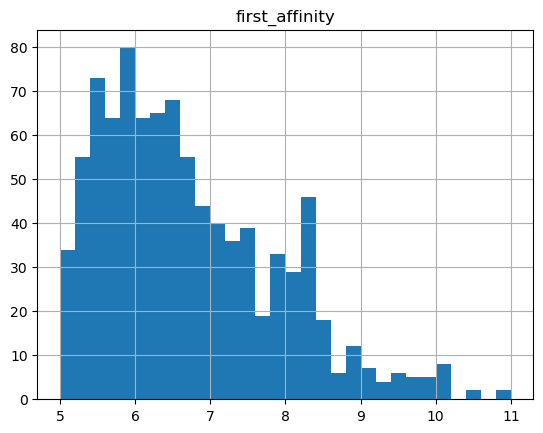

In [30]:
zinc_human_merged.hist('first_affinity', bins=30)

array([[<AxesSubplot: title={'center': 'last_affinity'}>]], dtype=object)

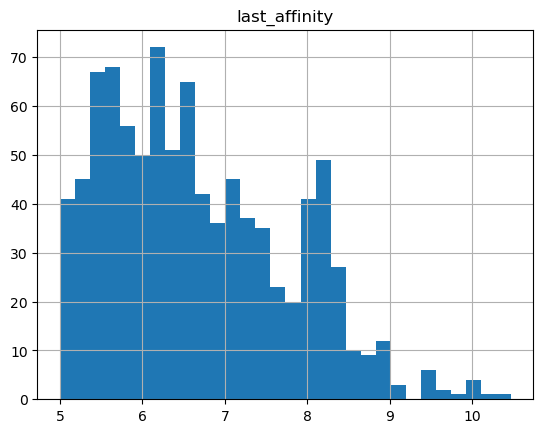

In [31]:
zinc_human_merged.hist('last_affinity', bins=30)

array([[<AxesSubplot: title={'center': 'mean_affinity'}>]], dtype=object)

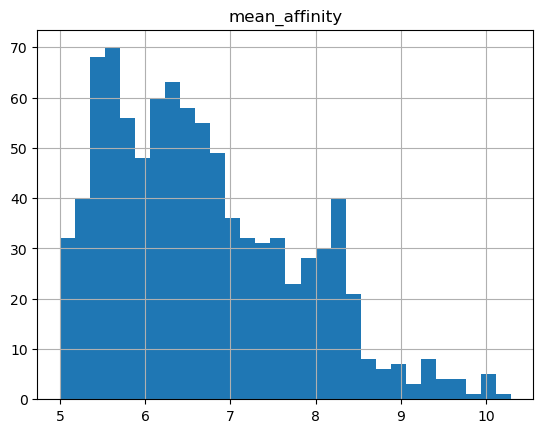

In [32]:
zinc_human_merged.hist('mean_affinity', bins=30)

### Saving the output

We can finally save the structures in a csv file using the `to_csv()` pandas function;

In [33]:
zinc_human_merged.to_csv('data/human_dhfr_zinc_structures.csv')